# FN6815 Numerical Methods for Financial Instrument Pricing

# Lecture 8: Basic Instrument Pricing and Pricing with Numerical Integration

-   Dr. Yang Ye
-   Email: yy@runchee.com
-   2023/2024 Mini Term 5


## 1. Introduction

In this lecture, we'll explore the fundamentals of financial instrument pricing and how numerical integration can be applied in this context.

As we have learnt earlier, numerical integration is a technique used to approximate the definite integral of a function. It's extensively used in financial instrument pricing, particularly for exotic options. These options often have customized payoff structures with European-style, i.e. do not have pre-maturity optionality.

For instance, consider an exotic option with a payoff that depends on the square of the underlying asset's price.


### 1.2 Pricing Methods Overview

There are several methods available for pricing financial instruments:

-   **Analytic/Semi-analytical methods (10%)**: These include closed-form solutions, numerical integration, and tree-based methods. They are used when the pricing formula can be derived analytically or approximated semi-analytically.

-   **Monte Carlo methods (60%)**: These methods use random sampling to estimate the price of financial instruments, especially when the dimensionality of the problem is high.

-   **Partial Differential Equations (PDEs) and Finite Difference methods (30%)**: These methods solve the PDEs that arise in financial instrument pricing, typically by discretizing the problem and solving the resulting system of equations.

The percentages in parentheses indicate the approximate frequency of use of each method in practice.

![shopping](img/08/shopping.png)


### 1.3 Choosing the Right Pricing Method

Each pricing method has its advantages and disadvantages:

-   **Analytic methods**: These have well-defined calculation steps but offer limited support for path-dependent options. Monte Carlo (MC) and Partial Differential Equations (PDE) methods can handle a wider variety of options.

-   **Monte Carlo methods**: These are usually "more the better" algorithms but could have hit limit of computation resource easily, meaning their accuracy improves with more iterations. However, they require high-performance hardware to run efficiently.

-   **PDE methods**: These run faster than MC methods but are more complex to set up. They can also suffer from the "curse of dimensionality".

<div class="alert alert-block alert-success">

**Curse of Dimensionality**

-   More complex models lead to a higher number of Stochastic Differential Equations (SDEs). If we have $n$ SDEs, each one adds an extra dimension to the PDE.
-   The computational cost of Monte Carlo methods is linear in the number of iterations $N$, but more assets require more iterations, leading to a complexity cost of $\mathit{O}(N \times n)$.
-   The computational cost of PDE methods is exponential in $\mathit{O}(N*M^n)$, where $N$ is the number of time intervals, $M$ is the number of asset price intervals, and $n$ is the number of assets.
-   Typically, PDE methods are used for up to $n = 3$ dimensions. For example, an exchange rate product might have SDEs for the local interest rate, foreign interest rate, and exchange rate.

</div>


## 2. Closed-Form Solutions

Closed-form solutions for option pricing are typically the fastest. For instance, Vanilla European options can be priced using the Black-Scholes model.

### Background

The Black-Scholes option pricing models for European-style options on a non-dividend paying stock are as follows:

For a call option: $$c = S_0 \textit{N}(d_1) - K e^{-rT} \textit{N}(d_2)$$

For a put option: $$p = K e^{-rT} \textit{N}(-d_2) - S_0 \textit{N}(-d_1)$$

$$d_1 = \frac {\log(S_0/K) + (r + \sigma^2 / 2)T} {\sigma \sqrt{T}}$$

$$d_2 = d_1 - \sigma \sqrt{T}$$

where:

-   $\textit{N}(x)$ is the cumulative density function of a standardized normal distribution.
-   $S_0$ is the current price of the stock.
-   $K$ is the strike price of the option.
-   $T$ is the time to maturity of the option.
-   $r$ is the (continuously-compounded) risk-free rate of return.
-   $\sigma$ is the stock price volatility.
-   $\log()$ is the natural logarithm.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import scipy.stats as sps

In [9]:
S_0 = 100
strike = 100
ttm = 2
rf = 0.03
sigma = 0.3


def bs_call(S, strike, ttm, rf, sigma):
    d1 = (np.log(S / strike) + (rf + sigma**2 / 2.0) * ttm) / (sigma * np.sqrt(ttm))
    d2 = d1 - sigma * np.sqrt(ttm)
    return S * sps.norm.cdf(d1) - strike * np.exp(-rf * ttm) * sps.norm.cdf(d2)


def bs_put(S, strike, ttm, rf, sigma):
    d1 = (np.log(S / strike) + (rf + sigma**2 / 2.0) * ttm) / (sigma * np.sqrt(ttm))
    d2 = d1 - sigma * np.sqrt(ttm)
    return sps.norm.cdf(-d2) * strike * np.exp(-rf * ttm) - sps.norm.cdf(-d1) * S


c = bs_call(S_0, strike, ttm, rf, sigma)
p = bs_put(S_0, strike, ttm, rf, sigma)
print("call:", c, "put:", p, c / p)

# Runs with different input don't affect performance
%timeit -n100 -r100 bs_call(100,90,2,.05,0.4)
%timeit -n100 -r100 bs_call(20,90,4.,.05,0.4)

call: 19.38254929806086 put: 13.559002656485731 1.429496681217149
191 µs ± 33 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
194 µs ± 20.3 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


#### Rapid Option Pricing with Closed-Form Equations

Closed-form equations enable rapid calculation of option prices for a variety of asset prices or strike prices. These equations provide a direct method to compute the price of an option given the necessary parameters, making them highly efficient for pricing a large number of options simultaneously.


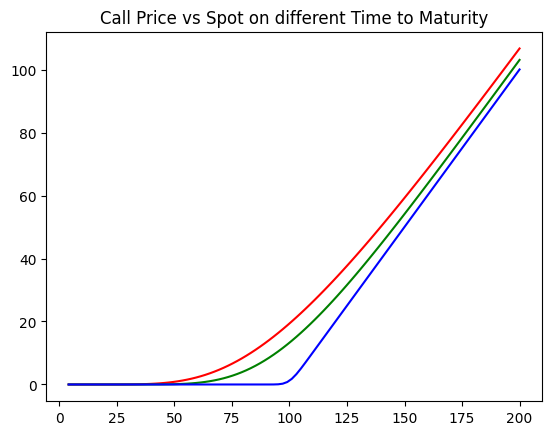

In [10]:
xs = np.linspace(4, 200, 100)
cs = bs_call(xs, 100, 2, rf, sigma)
plt.plot(xs, cs, "r-")
cs = bs_call(xs, 100, 1, rf, sigma)
plt.plot(xs, cs, "g-")
cs = bs_call(xs, 100, 0.01, rf, sigma)
plt.plot(xs, cs, "b-")
plt.title("Call Price vs Spot on different Time to Maturity")
plt.show()

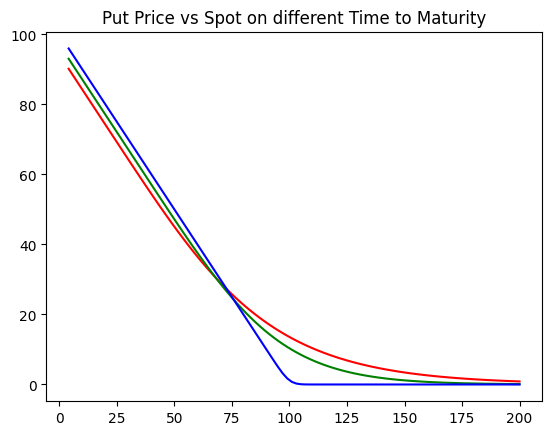

In [11]:
xs = np.linspace(4, 200, 100)
cs = bs_put(xs, 100, 2, rf, sigma)
plt.plot(xs, cs, "r-")
cs = bs_put(xs, 100, 1, rf, sigma)
plt.plot(xs, cs, "g-")
cs = bs_put(xs, 100, 0.01, rf, sigma)
plt.plot(xs, cs, "b-")
plt.title("Put Price vs Spot on different Time to Maturity")
plt.show()

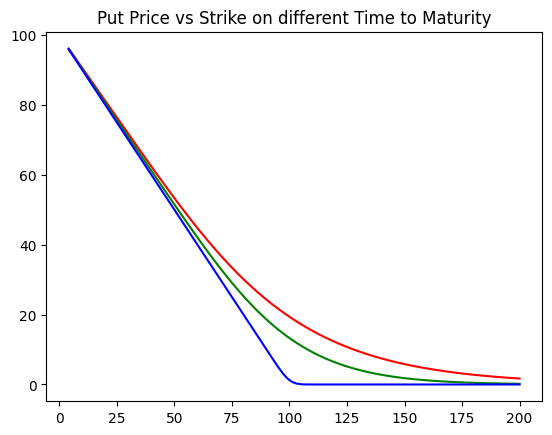

In [12]:
xs = np.linspace(4, 200, 100)
cs = bs_call(100, xs, 2, rf, sigma)
plt.plot(xs, cs, "r-")
cs = bs_call(100, xs, 1, rf, sigma)
plt.plot(xs, cs, "g-")
cs = bs_call(100, xs, 0.01, rf, sigma)
plt.plot(xs, cs, "b-")
plt.title("Put Price vs Strike on different Time to Maturity")
plt.show()

## 3. Pricing by Integration


#### Flexibility of Integration in Option Pricing

While closed-form solutions are faster, numerical integration offers more flexibility with respect to the payoff function.

For path-independent options, pricing by integration can accommodate any payoff function without the need for decomposition.

Consider, for example, a 'wedding cake' option, which has a payoff structure that resembles the tiers of a wedding cake.

<img src="img/08/wedding_cake.jpg" width="500">

This complex payoff structure can be handled directly by numerical integration methods, unlike closed-form solutions that require simpler payoff functions.

In the next section, we'll discuss the payoff functions for digital call and put options.


In [13]:
S = np.array([1, 2, 3, 4])

# np.ones(shape=S.shape) if S >= 2 else np.zeros(shape=S.shape)


def digital_call_po(S, strike):
    po = np.ones(shape=S.shape)
    po[S < strike] = 0
    return po


def digital_put_po(S, strike):
    po = np.ones(shape=S.shape)
    po[S > strike] = 0
    return po


digital_put_po(S, 2), digital_call_po(S, 2)

(array([1., 1., 0., 0.]), array([0., 1., 1., 1.]))

Numerical integration can be performed using various methods, Two common methods are:

-   **Linear/Quadratic Approximation**: This method approximates the function to be integrated with linear or quadratic functions, making the integral easier to compute.

-   **Monte Carlo Integration**: This method uses random sampling to estimate the integral. It's particularly useful when dealing with high-dimensional integrals, but requires a large number of samples to achieve high accuracy


### 3.1 Numerical Integration


#### Geometric Brownian Motion and Option Pricing

For Geometric Brownian Motion (GBM), we have the following stochastic differential equation, where $W$ is the standard Wiener process:

$$
\frac {\mathit{d}S} S = r \mathit{d}t + \sigma \mathit{d}W
$$

The **exact** solution to the GBM is

$$
{S_t} = {S_0} e ^ {(\mu -\frac{\sigma ^2}{2})dt+\sigma W(t)}
$$

Here, the change in $W$ over a time interval $t$ is a normal random variable with $\mathit{N}(0,t)$, i.e., $W(t) = \sqrt{t} z$. So, we have:

$$
{S_t} = {S_0} e ^ {(\mu -\frac{\sigma ^2}{2}) t+\sigma \sqrt{t} z}
$$

We define a payoff function $\text{PayOff}$, which is the reward at the outcome of the option. The payoff function can take any form and depend on any kind of input, with the asset price $S_t$ being a primary dependent variable.

-   If the payoff is $\color{green}{\text{path-independent}}$, it's a function of the ending price $S_t(z, T)$.
-   If the payoff is $\color{red}{\text{path-dependent}}$, it's a function of the price series $S_t(z, t)$ for $t \in (0,T)$.

When we have a $\color{green}{\text{path-independent}}$ payoff and the inputs $T$, $S_0$, $\mu$, and $\sigma$ are constant (with $\mu$ and $\sigma$ being the average value during the period), the only variable in the payoff function $\text{Payoff}{(S_T(z))}$ is the normal random variable $z$.

The expectation of the $\text{PayOff}$ can be calculated as a direct integration of the product of the Payoff function and the probability density function at $z$, with respect to $z$ (Radon–Nikodym theorem).

$$\mathbb{E}{(\text{Payoff}{(S_T(z))})} =  \int_{-\infty}^{+\infty} \text{Payoff}(S_T(z)) * \text{pdf}(z)\, \mathrm{d}z$$

Applying no-arbitrage pricing, the option's present value (PV) is the expected value of $\text{PayOff}$ discounted to the present.

$$
PV = \text{discount} \times \mathbb{E}{(\text{Payoff}{(S_T(z))})}
$$

To combine the above, to price a path-independent option, we just need to perform an integration of the terminal payoff and the PDF of the normal distribution:

$$
PV = \text{discount} \times \int_{-\infty}^{+\infty} \text{Payoff}(S_T(z)) * \text{pdf}(z)\, \mathrm{d}z
$$

In practice, we can only integrate over a smaller range $[-a,+b]$ instead of $[{-\infty}, {+\infty}]$. Thanks to the normal distribution being a **centralized distribution**, a range of $[-6, 6]$ can cover a large part of it. However, the range $[-a, +b]$ should be sufficiently large to cover the entire non-zero range of the payoff function with the option's parameters (`S_0, ttm, rf, sigma`). For example, for a call option with a strike of 110, the integration range should include GBM prices >= 110. The difference between increases in the integration range should be lower than the tolerance.

$$
PV = \text{discount} \times \int_{-a}^{+b} \text{Payoff}(S_T(z)) * \text{pdf}(z)\, \mathrm{d}z
$$

Let's get $z$ for a range of prices to find the sufficient large range for integration.


In [14]:
def gbm(S_0, ttm, rf, sigma, z):
    S = S_0 * np.exp((rf - sigma**2 / 2) * ttm + sigma * np.sqrt(ttm) * z)
    return S


# z is dependent on all these variable
def z_value(S, S_0, ttm, rf, sigma):
    z = (np.log(S / S_0) - (rf - sigma**2 / 2.0) * ttm) / (sigma * np.sqrt(ttm))
    return z


z_1 = z_value(1, S_0, ttm, rf, sigma)
z_20 = z_value(20, S_0, ttm, rf, sigma)
z_110 = z_value(110, S_0, ttm, rf, sigma)
z_120 = z_value(120, S_0, ttm, rf, sigma)
z_200 = z_value(200, S_0, ttm, rf, sigma)

print((z_1, z_20, z_110, z_120, z_200))
print(gbm(S_0, ttm, rf, sigma, z=z_20))

# Changes to z when we increase the ttm

z_1 = z_value(1, S_0, ttm * 3, rf, sigma)
z_20 = z_value(20, S_0, ttm * 3, rf, sigma)
z_110 = z_value(110, S_0, ttm * 3, rf, sigma)
z_120 = z_value(120, S_0, ttm * 3, rf, sigma)
z_200 = z_value(200, S_0, ttm * 3, rf, sigma)
print((z_1, z_20, z_110, z_120, z_200))
print(gbm(S_0, ttm * 3, rf, sigma, z=z_20))

(-10.783779545315657, -3.7227708611509227, 0.2953589263044791, 0.5004467086703, 1.7044742505662334)
20.0
(-6.144368365276803, -2.0676931007240076, 0.25217521370222246, 0.37058270005863253, 1.0657283254839731)
20.0


#### Payoff Function Implementation

Numerical Integration (NI) allows us to separate the Payoff and probability, providing an opportunity to implement a more structured approach in programming.

-   We can define functions for different payoff types, such as `call_payoff()` and `put_payoff()`
-   These can be integrated with the process (`gbm`) in `option_payoff()`.

Next, we'll implement the payoff function as described above. This function will calculate the value of the option at expiry based on the given inputs.

Note: We'll be using the `np.maximum` function from the numpy library, which returns the maximum of the input values.


In [15]:
# (Optional) Here I used npt to do Python typing for numpy

import numpy.typing as npt


def call_payoff(S: npt.ArrayLike, strike: npt.ArrayLike) -> npt.ArrayLike:
    return np.maximum(S - strike, 0)


def put_payoff(S, strike):
    return np.maximum(strike - S, 0)


def option_payoff(S_0, strike, ttm, rf, sigma, payoff_func, z):
    S = gbm(S_0, ttm, rf, sigma, z)
    return payoff_func(S, strike)


print("Call @ z = 0:", option_payoff(S_0, strike, ttm, rf, sigma, call_payoff, 0))
print("Put  @ z = 0:", option_payoff(S_0, strike, ttm, rf, sigma, put_payoff, 0))

# Check the range of z
print((z_value(300, S_0, ttm, rf, sigma), z_value(20, S_0, ttm, rf, sigma)))

# Verification
print(option_payoff(S_0, 300, ttm, rf, sigma, lambda x, y: x, 2.6601))
print(option_payoff(S_0, 300, ttm, rf, sigma, lambda x, y: x, -3.72277))

Call @ z = 0: 0.0
Put  @ z = 0: 2.9554466451491805
(2.660164675492299, -3.7227708611509227)
299.9917682666852
20.000007307109218


#### Visualizing the Payoff Function and Probability

Next, we'll plot the payoff function alongside the probability derived from the PDF of the normal distribution. The value of the option is essentially the product of these two factors, discounted to its Net Present Value (NPV).

This visualization will help us understand how the final option price is influenced by both the payoff at expiry and the probability of that payoff.


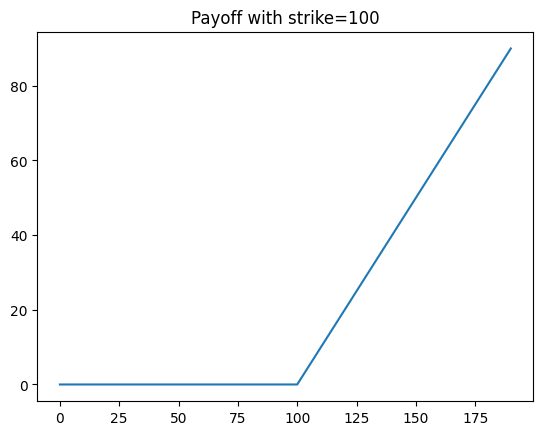

verify: 0.36842577779469815 0.36842577779469815 True
verify: 0.22269694424480851 0.22269694424480854 True
verify: 0.3989422804014327 0.3989422804014327 True


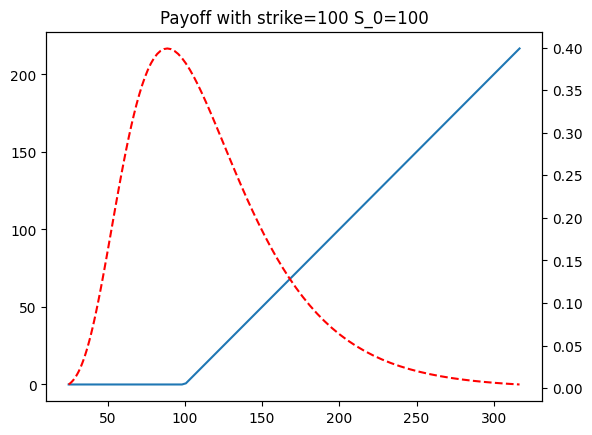

S_t/prob range: 24.838/0.004 316.702/0.004 for z in -3.0 to 3.0


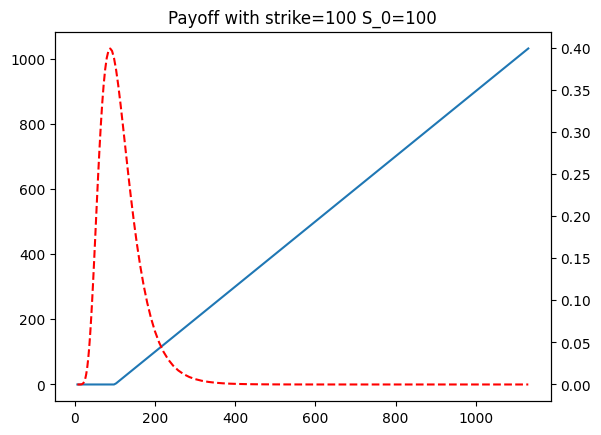

S_t/prob range: 6.956/0.000 1130.884/0.000 for z in -6.0 to 6.0


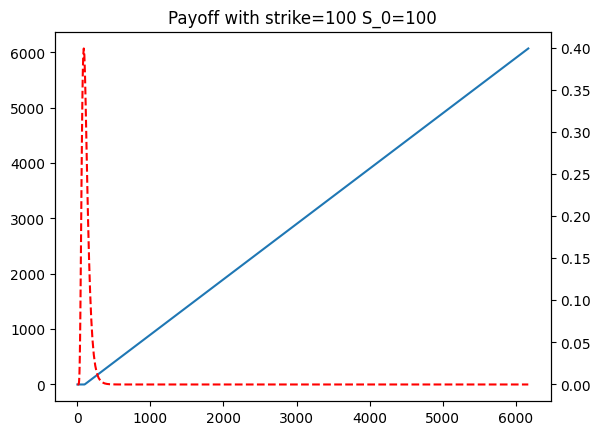

S_t/prob range: 1.274/0.000 6172.202/0.000 for z in -10.0 to 10.0


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

S = np.arange(0, 200, 10)
payoff = call_payoff(S, strike)
plt.plot(S, payoff)
plt.title(f"Payoff with {strike=}")
plt.show()


def normal_pdf(z, mean=0, sd=1):
    # return 1/np.sqrt(2*np.pi) when mean = 0, sd = 1
    return 1 / sd / np.sqrt(2 * np.pi) * np.exp(-((z - mean) ** 2) / sd**2 / 2)


def verify_normal_pdf(z, mean=0, sd=1):
    a = normal_pdf(z, mean, sd)
    b = sps.norm.pdf(z, mean, sd)
    print("verify:", a, b, np.isclose(a, b))


verify_normal_pdf(normal_pdf(0))
verify_normal_pdf(normal_pdf(0, 0.1, 0.05))
verify_normal_pdf(normal_pdf(-0.312, 0.3, 0.05))


def plot_po(z):
    prob = sps.norm.pdf(z)
    S_t = S_0 * np.exp((rf - sigma**2) * ttm + sigma * np.sqrt(ttm) * z)

    payoff = call_payoff(S_t, strike)
    plt.plot(S_t, payoff)
    plt.gca().twinx().plot(S_t, prob, "r--")
    plt.title(f"Payoff with {strike=} {S_0=}")
    plt.show()
    print(
        f"S_t/prob range: {np.min(S_t):.3f}/{prob[0]:.3f} {np.max(S_t):.3f}/{prob[-1]:.3f} for z in {np.min(z)} to {np.max(z)}"
    )


plot_po(np.linspace(-3, 3, 101))
plot_po(np.linspace(-6, 6, 101))
plot_po(np.linspace(-10, 10, 101))

#### 3.2.1 Quadrature


In [18]:
import scipy.integrate as spi
import scipy.stats as sps

# integrate a normal distribution's CDF
spi.quad(lambda x: sps.norm.pdf(x), -10, 10)

(1.0000000000000002, 8.671029888166837e-10)

In [19]:
spi.quad(lambda x: sps.norm.pdf(x), 0, 10)

(0.5000000000000001, 4.33551523051608e-10)

In [22]:
import scipy.integrate as spi
import scipy.stats as sps

# Below uses a very concise form of integration with lambda functions.

ni_call = (
    np.exp(-rf * ttm)
    * spi.quad(
        lambda x: np.maximum(
            S_0 * np.exp((rf - 0.5 * sigma**2) * ttm + sigma * np.sqrt(ttm) * x)
            - strike,
            0,
        )
        * sps.norm.pdf(x),
        -10,
        10,
    )[0]
)
ni_put = (
    np.exp(-rf * ttm)
    * spi.quad(
        lambda x: np.maximum(
            strike
            - S_0 * np.exp((rf - 0.5 * sigma**2) * ttm + sigma * np.sqrt(ttm) * x),
            0,
        )
        * sps.norm.pdf(x),
        -10,
        10,
    )[0]
)
print(
    "NI vs. Analytical:",
    ni_call,
    ni_put,
    bs_call(S_0, strike, ttm, rf, sigma),
    bs_put(S_0, strike, ttm, rf, sigma),
)


# To reduce code density, we can split the **integrand** into a separate function
def integrand(S_0, strike, ttm, rf, sigma, payoff_func):
    def _inner(z, payoff_func=payoff_func):
        return option_payoff(
            S_0, strike, ttm, rf, sigma, payoff_func, z
        ) * sps.norm.pdf(z)

    return _inner


ni_call = (
    np.exp(-rf * ttm)
    * spi.quad(integrand(S_0, strike, ttm, rf, sigma, call_payoff), -10, 10)[0]
)
ni_put = (
    np.exp(-rf * ttm)
    * spi.quad(integrand(S_0, strike, ttm, rf, sigma, put_payoff), -10, 10)[0]
)
print(
    "NI (quad) vs. Analytical:",
    ni_call,
    ni_put,
    bs_call(S_0, strike, ttm, rf, sigma),
    bs_put(S_0, strike, ttm, rf, sigma),
)

NI vs. Analytical: 19.382549294727323 13.559002656588023 19.38254929806086 13.559002656485731
NI (quad) vs. Analytical: 19.382549294727323 13.559002656588023 19.38254929806086 13.559002656485731


#### 3.2.2 Trapezoidal Integration


We can utilize the `spi.trapezoid` function from the SciPy library for numerical integration. This function applies the trapezoidal rule to compute the integral of a function. We can _reuse_ our previously defined integrand function with this method to calculate the option price.


In [23]:
ll = np.linspace(-10, 10, 1001)
ni_call = np.exp(-rf * ttm) * spi.trapezoid(
    integrand(S_0, strike, ttm, rf, sigma, call_payoff)(ll), ll
)
ni_put = np.exp(-rf * ttm) * spi.trapezoid(
    integrand(S_0, strike, ttm, rf, sigma, put_payoff)(ll), ll
)
print(f"NI (trapezoidal): {ni_call, ni_put}")

NI (trapezoidal): (19.382810242040463, 13.55926360046533)


#### 3.2.3 By-hand


We write a customized `hand_int` function but still with the previously defined `integrand` function.


In [24]:
def hand_int(int_func, upper_b=10, lower_b=-10, points=1000):
    h = (upper_b - lower_b) / points
    ps = np.linspace(-10, 10, points + 1)
    int_ps = int_func(ps)
    return h * np.sum(int_ps)


ni_call = np.exp(-rf * ttm) * hand_int(
    integrand(S_0, strike, ttm, rf, sigma, call_payoff)
)
ni_put = np.exp(-rf * ttm) * hand_int(
    integrand(S_0, strike, ttm, rf, sigma, put_payoff)
)

print(f"by-hand: {ni_call, ni_put}")

by-hand: (19.38281024204046, 13.55926360046533)


#### 3.2.5 Monte Carlo Integration

Monte Carlo integration is a technique that uses random sampling to approximate definite integrals. For a function $q(x)$ over the interval $[a, b]$, the integral can be estimated as:

$$
\int_a^b q(x) \mathrm{d}x = (b-a) \int_a^b q(x) \frac 1 {b-a} \mathrm{d}x = (b-a) \int_a^b q(x) f_U(x) \mathrm{d}x = (b-a) \mathbb{E}({q(U)})
$$

Here, $U$ is a continuous uniform random variable with density function $f_U(x) = \frac 1 {b-a}$.

#### Moving to high-dimension

-   One dimension

    $$
    \int_c^d q(x) \mathrm{d}x = (b-a) \mathbb{E}({q(U_x)})
    $$

-   Two and higher Dimension
    $$
    \int_c^d \int_a^b q(x,y) \mathrm{d}x \mathrm{d}y = (d-c)(b-a) \mathbb{E}({q(U_x, U_y)})
    $$

Next, we'll implement a Monte Carlo integration function. We'll find our previously defined `integrand()` function useful here. Run the following code a few times to observe the results.


In [25]:
import numpy.random as npr


def mc_int(func, rg, N=int(1e6)):
    nr = npr.uniform(rg[0], rg[1], size=N)
    sums = func(nr)
    return np.mean(sums) * (rg[1] - rg[0])


ni_call = np.exp(-rf * ttm) * mc_int(
    integrand(S_0, strike, ttm, rf, sigma, call_payoff), (-6, 6)
)
ni_put = np.exp(-rf * ttm) * mc_int(
    integrand(S_0, strike, ttm, rf, sigma, put_payoff), (-6, 6)
)
print(
    "mc:",
    ni_call,
    ni_put,
    bs_call(S_0, strike, ttm, rf, sigma),
    bs_put(S_0, strike, ttm, rf, sigma),
)

mc: 19.398748010955902 13.557536562125925 19.38254929806086 13.559002656485731


In [26]:
# 2-d MC integration


def mc_int_2d(func, rg1, rg2, N=int(1e6)):
    nr1 = npr.uniform(rg1[0], rg1[1], size=N)
    nr2 = npr.uniform(rg2[0], rg2[1], size=N)
    sums = func(nr1, nr2)
    print(sums.shape)
    res = np.mean(sums) * (rg1[1] - rg1[0]) * (rg2[1] - rg2[0])
    std = np.std(sums) * (rg1[1] - rg1[0]) * (rg2[1] - rg2[0]) / np.sqrt(N)
    return res, std


print(
    mc_int_2d(lambda x, y: np.sqrt(x**2 + y**2) < 1, (0, 1), (0, 1), int(1000 * 100)),
    np.pi / 4,
)


def rec_int_2d(func, rg1, rg2, N=int(1e6)):
    nr1, nr2 = np.meshgrid(
        np.linspace(rg1[0], rg1[1], N), np.linspace(rg2[0], rg2[1], N)
    )
    sums = func(nr1, nr2)
    print(sums.shape)
    return sums.sum() / N**2 * (rg1[1] - rg1[0]) * (rg2[1] - rg2[0])


print(
    rec_int_2d(lambda x, y: np.sqrt(x**2 + y**2) < 1, (0, 1), (0, 1), int(1000)),
    np.pi / 4,
)

(100000,)
(0.78464, 0.0012999233454323374) 0.7853981633974483
(1000, 1000)
0.784785 0.7853981633974483


### 3.3 Designing Interfaces for Functions

In the following section, we'll present a complete version of the code, broken down into step-by-step segments.

#### Design Guidelines

1. **Separate Data from Logic**: This makes the code easier to understand and maintain. It also allows for independent testing and reuse of logic.

2. **Make Logic Step-able**: Breaking down the logic into smaller, manageable steps makes the code easier to debug and understand.

3. **Make Code Reusable**: Design your code such that minimal changes are required to add new functionality. This increases the longevity and utility of your code.


In [35]:
import numpy as np
import numpy.random as npr
import scipy.integrate as spi
import scipy.stats as sps


def call_payoff(S, strike):
    return np.maximum(S - strike, 0)


def put_payoff(S, strike):
    return np.maximum(strike - S, 0)


def gbm(S_0, strike, ttm, rf, sigma, z):
    return S_0 * np.exp((rf - 0.5 * sigma**2) * ttm + sigma * np.sqrt(ttm) * z)


def option_payoff(S_0, strike, ttm, rf, sigma, payoff_func, z):
    S = gbm(S_0, strike, ttm, rf, sigma, z)
    return payoff_func(S, strike)


def integrand(S_0, strike, ttm, rf, sigma, payoff_func):
    def _inner(z, payoff_func=payoff_func):
        return option_payoff(
            S_0, strike, ttm, rf, sigma, payoff_func, z
        ) * sps.norm.pdf(z)

    return _inner


S_0 = 100
strike = 100
ttm = 2
rf = 0.03
sigma = 0.3

ni_call = (
    np.exp(-rf * ttm)
    * spi.quad(integrand(S_0, strike, ttm, rf, sigma, call_payoff), -10, 10)[0]
)
ni_put = (
    np.exp(-rf * ttm)
    * spi.quad(integrand(S_0, strike, ttm, rf, sigma, put_payoff), -10, 10)[0]
)


print("spi.quad:", ni_call, ni_put)

spi.quad: 19.382549294727323 13.559002656588023


#### Utilizing the functools Module to Create a Partial Function

In our code, we use an `_inner` function to return a function from another function. Alternatively, we could use `functools.partial` to return a partially initialized function with a subset of the required inputs.

This technique is known as "currying". The returned function can be executed later by calling it with the remaining parameters. This approach can enhance code readability and reusability.

functools.partial is equivalent to the use of lambda

```python
def f(x, y):
    return x + y

g = lambda x: f(x, 2)
g = functools.partial(f, y=2)
```


In [28]:
import functools


def f(a, b):
    return a - b


# f(3, 4)

print(
    (
        # add the name of the argument to be assigned
        (
            functools.partial(f, b=3)(4),
            functools.partial(f, 3)(4),
        ),
        (
            (lambda a, b=3: f(a, b))(
                4
            ),  # The function definition limits the the default value to be set for later not earlier arguments.
            (lambda b, a=3: f(a, b))(4),
        ),  # Need to put the earlier argument to the backseat to allow for default value.
        # Continue to use partial to get a function with ()
        functools.partial(functools.partial(f, 3), 4)(),
    )
)

((1, -1), (1, -1), -1)


#### Refactoring with functools.partial

Next, we'll revisit our original code and improve it by using functools.partial. This will allow us to create partially initialized functions, enhancing the modularity and reusability of our code.


In [29]:
import functools


# An improved version to integrand()
def integrand2(func, z):
    return func(z) * sps.norm.pdf(z)


def priceEuropeanOption(S, strike, ttm, rf, sigma, payoff_func):
    op_x = functools.partial(option_payoff, S, strike, ttm, rf, sigma, payoff_func)
    int_x = functools.partial(integrand2, op_x)
    discountFactor = np.exp(-rf * ttm)
    R = 10
    return discountFactor * spi.quad(int_x, -R, R)[0]


print(priceEuropeanOption(S_0, strike, ttm, rf, sigma, call_payoff))
print(priceEuropeanOption(S_0, strike, ttm, rf, sigma, put_payoff))

19.382549294727323
13.559002656588023


#### Recap and Discussion

-   **Recap**: Always remember to include the discount factor in your calculations. However, be careful not to apply the discounting twice.

-   **Discussion**: The choice between Trapezoidal Integration, Gaussian Quadrature Integration, and Monte Carlo Integration depends on the specific requirements of your problem:

    -   **Trapezoidal Integration**: This method is simple and easy to implement. It's best suited for problems where the function is relatively smooth and the integral is over a low-dimensional space.

    -   **GQ Integration**: This method is more accurate than trapezoidal integration for functions that are not smooth. It's also efficient for low-dimensional integrals.

    -   **Monte Carlo Integration**: This method is best for high-dimensional integrals, where traditional numerical integration methods become inefficient or impractical. However, it requires a _very_ large number of samples to achieve high accuracy.


## 4. Assignment

1. **Binary Options Pricing**: Apply Numerical Integration to price binary call/put options. The payoff of a binary call is 1 if $S>K$ and 0 otherwise, while for a binary put it's 1 if $S<K$ and 0 otherwise. Compare the results between the three numerical integration methods.

2. **Butterfly Options Pricing**: Calculate the price of a series of adjacent butterfly options ranging from $0 to $200 using numerical integration. Each butterfly option has a difference of strike prices of $10. Repeat the calculation with a difference of strike prices of $1.

The option parameters used in tasks 1 and 2 are:

```python
S_0 = 100
strike = 100
ttm = 2
rf = 0.03
sigma=0.3
```

Note: A butterfly call option's payoff is composed of four call options with strikes $K_1 < K_2 < K_3$ and is calculated as $Call (K_1) - 2 * Call (K_2) + Call (K_3)$. In this question, $K_2 - K_1 = K_3 - K_2 = $10$ or $$1$.

3. **Volume Calculation**: Use Monte Carlo integration to calculate the volume of a cube with the left-bottom point at non-zero coordinates $(a, b, c)$. Calculate for 1) a cube where each side has a length of 1 unit, and 2) a cuboid where each side has lengths of 1, 2, and 3 units respectively.


In [38]:
import numpy as np
import scipy.integrate as spi
import scipy.stats as sps

S_0 = 100
strike = 100
ttm = 2
rf = 0.03
sigma=0.3

# 1. Binary Options Pricing
def binary_call_payoff(S, strike):
    po = np.ones(shape=S.shape)
    po[S <= strike] = 0
    return po


def binary_put_payoff(S, strike):
    po = np.ones(shape=S.shape)
    po[S >= strike] = 0
    return po


def gbm(S_0, strike, ttm, rf, sigma, z):
    return S_0 * np.exp((rf - 0.5 * sigma**2) * ttm + sigma * np.sqrt(ttm) * z)


def option_payoff(S_0, strike, ttm, rf, sigma, payoff_func, z):
    S = gbm(S_0, strike, ttm, rf, sigma, z)
    return payoff_func(S, strike)


def integrand(S_0, strike, ttm, rf, sigma, payoff_func):
    def _inner(z, payoff_func=payoff_func):
        return option_payoff(
            S_0, strike, ttm, rf, sigma, payoff_func, z
        ) * sps.norm.pdf(z)

    return _inner

# a. for quad
ni_call_quad = (
    np.exp(-rf * ttm)
    * spi.quad(integrand(S_0, strike, ttm, rf, sigma, binary_call_payoff), -10, 10)[0]
)
ni_put_quad = (
    np.exp(-rf * ttm)
    * spi.quad(integrand(S_0, strike, ttm, rf, sigma, binary_put_payoff), -10, 10)[0]
)

# b. for trap
ll = np.linspace(-10, 10, 1001)
ni_call_trap = (
    np.exp(-rf * ttm)
    * spi.trapezoid(integrand(S_0, strike, ttm, rf, sigma, binary_call_payoff)(ll), ll)
)
ni_put_trap = (
    np.exp(-rf * ttm)
    * spi.trapezoid(integrand(S_0, strike, ttm, rf, sigma, binary_put_payoff)(ll), ll)
)

# c. for mc
def mc_int(func, rg, N=int(1e6)):
    nr = npr.uniform(rg[0], rg[1], size=N)
    sums = func(nr)
    return np.mean(sums) * (rg[1] - rg[0])

ni_call_mc = np.exp(-rf * ttm) * mc_int(
    integrand(S_0, strike, ttm, rf, sigma, binary_call_payoff), (-6, 6)
)
ni_put_mc = np.exp(-rf * ttm) * mc_int(
    integrand(S_0, strike, ttm, rf, sigma, binary_put_payoff), (-6, 6)
)

print("spi.quad:", ni_call_quad, ni_put_quad)
print("spi.trap:", ni_call_trap, ni_put_trap)
print("mc_int:", ni_call_mc, ni_put_mc)


spi.quad: 0.44433770136701084 0.49742683221723805
spi.trap: 0.4446036134708808 0.49716092011336793
mc_int: 0.4434560045671626 0.49729418522910845


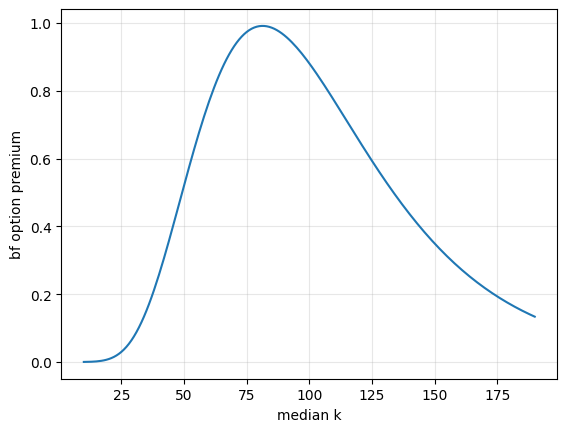

In [51]:
# 2. Butterfly Option Pricing
def call_payoff(S: npt.ArrayLike, strike: npt.ArrayLike) -> npt.ArrayLike:
    return np.maximum(S - strike, 0)

def butterfly_option_pricing(S_0, k1, k2, k3, ttm, rf, sigma):

    call_1 = np.exp(-rf * ttm)* spi.quad(integrand(S_0, k1, ttm, rf, sigma, call_payoff), -10, 10)[0]
    call_2 = np.exp(-rf * ttm)* spi.quad(integrand(S_0, k2, ttm, rf, sigma, call_payoff), -10, 10)[0]
    call_3 = np.exp(-rf * ttm)* spi.quad(integrand(S_0, k3, ttm, rf, sigma, call_payoff), -10, 10)[0]
    
    return call_1 - 2 * call_2 + call_3
k_array = np.linspace(10, 190, 181)

bf_option_prices = []
for k in k_array:
    bf_option_prices.append(butterfly_option_pricing(S_0, k - 10, k, k + 10, ttm, rf, sigma))

bf_option_prices = np.array(bf_option_prices)

plt.plot(k_array, bf_option_prices)
plt.xlabel('median k')
plt.ylabel('bf option premium')
plt.grid(alpha = 0.3)

In [61]:
# 3-d MC integration

a, b, c = 0, 0, 0

def mc_int_3d_cube(func, rg1, rg2, rg3, N=int(1e6)):
    nr1 = npr.uniform(rg1[0], rg1[1], size=N)
    nr2 = npr.uniform(rg2[0], rg2[1], size=N)
    nr3 = npr.uniform(rg3[0], rg3[1], size=N)
    sums = func(nr1, nr2, nr3)
    print(sums.shape)
    res = np.mean(sums) * (rg1[1] - rg1[0]) * (rg2[1] - rg2[0]) * (rg3[1] - rg3[0])
    # std = np.std(sums) * (rg1[1] - rg1[0]) * (rg2[1] - rg2[0]) / np.sqrt(N)
    return res

print(mc_int_3d_cube(lambda x, y, z: (x-a)*(y-a)*(z-a) < 1, (a, a+1), (b, b+1), (c, c+1), int(1000 * 100)))

(100000,)
1.0


In [65]:
# 3-d MC integration

a, b, c = 0, 0, 0

def mc_int_3d_cuboid(func, rg1, rg2, rg3, N=int(1e6)):
    nr1 = npr.uniform(rg1[0], rg1[1], size=N)
    nr2 = npr.uniform(rg2[0], rg2[1], size=N)
    nr3 = npr.uniform(rg3[0], rg3[1], size=N)
    sums = func(nr1, nr2, nr3)
    print(sums.shape)
    res = np.mean(sums) * (rg1[1] - rg1[0]) * (rg2[1] - rg2[0]) * (rg3[1] - rg3[0])
    # std = np.std(sums) * (rg1[1] - rg1[0]) * (rg2[1] - rg2[0]) / np.sqrt(N)
    return res

print(mc_int_3d_cuboid(lambda x, y, z: (x-a)*(y-a)*(z-a) < 6, (a, a+1), (b, b+2), (c, c+3), int(1000 * 100)))

(100000,)
6.0


##### Appendix: timestamp


In [20]:
from datetime import datetime

print(f"Generated on {datetime.now()}")

Generated on 2024-03-19 13:00:37.603489
